In [1]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import geopandas as gpd

In [2]:
# set the filepath and load
fp = "shape_files\\India_Districts_ADM2_GADM\\India_Districts_ADM2_GADM.shp"
#reading the file stored in variable fp
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,FID,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,NL_NAME_2,VARNAME_2,TYPE_2,ENGTYPE_2,geometry
0,1,105,IND,India,17,Karnataka,239,Shimoga,None,None,District,District,"POLYGON ((75.12553 14.62678, 75.13207 14.62507..."
1,2,105,IND,India,17,Karnataka,240,Tumkur,None,None,District,District,"MULTIPOLYGON (((76.97153 14.05239, 76.94973 14..."
2,3,105,IND,India,17,Karnataka,241,Udupi,None,None,District,District,"MULTIPOLYGON (((74.78125 13.09931, 74.78069 13..."
3,4,105,IND,India,1,Andaman and Nicobar,1,Andaman Islands,None,None,District,District,"MULTIPOLYGON (((92.51583 10.89764, 92.51611 10..."
4,5,105,IND,India,17,Karnataka,242,Uttar Kannand,None,None,District,District,"MULTIPOLYGON (((74.48292 14.01125, 74.48292 14..."


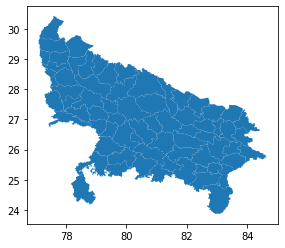

In [3]:
#Isolate the UP districts
map_df_up = map_df[map_df['NAME_1'] == 'Uttar Pradesh']

#Check the resulting UP Plot
map_df_up.plot()

# Generating a Standalone Choropleth Map

In [4]:
#Get the data CSV file
df = pd.read_csv('data\\UP_dummy_data.csv')
df.head()

,Tractor Model,Installed On,installation_state,installation_district
0,MAHINDRA ARJUN Ultra 605 DI-57HP,2019-10-12T12:49:38.554Z,Uttar Pradesh,Aligarh
1,MAHINDRA BHOOMIPUTRA 265 DI-35 HP,2019-10-14T09:15:07.407Z,Uttar Pradesh,Aligarh
2,MAHINDRA BHOOMIPUTRA 265 DI-35 HP,2019-10-14T11:24:34.931Z,Uttar Pradesh,Aligarh
3,MAHINDRA BHOOMIPUTRA 265 DI-35 HP,2019-11-26T06:20:57.740Z,Uttar Pradesh,Aligarh
4,MAHINDRA ARJUN Ultra 1 555 DI-50 HP,2020-01-09T09:40:19.475Z,Uttar Pradesh,Aligarh


In [5]:
#Get district wise installation count
df_district = df['installation_district'].value_counts().to_frame()
df_district.reset_index(inplace=True)
df_district.columns = ['district','count']
df_district.head()

,district,count
0,Meerut,28
1,Azamgarh,27
2,Lakhimpur Kheri,17
3,Kanpur,15
4,Sonbhadra,15


In [6]:
#Merge the districts df with the geopandas df
merged = map_df_up.set_index('NAME_2').join(df_district.set_index('district'))
merged.head()

,FID,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NL_NAME_2,VARNAME_2,TYPE_2,ENGTYPE_2,geometry,count
NAME_2,,,,,,,,,,,,,
Agra,74,105,IND,India,33,Uttar Pradesh,493,None,None,District,District,"POLYGON ((77.90040 27.26083, 77.90006 27.25176...",NaN
Aligarh,77,105,IND,India,33,Uttar Pradesh,494,None,None,District,District,"POLYGON ((77.83832 28.14633, 77.83477 28.13895...",12.0
Allahabad,81,105,IND,India,33,Uttar Pradesh,495,None,None,District,District,"POLYGON ((81.93710 25.74369, 81.94847 25.74222...",4.0
Ambedkar Nagar,83,105,IND,India,33,Uttar Pradesh,496,None,None,District,District,"POLYGON ((82.57671 26.60777, 82.58559 26.60561...",NaN
Auraiya,87,105,IND,India,33,Uttar Pradesh,497,None,None,District,District,"POLYGON ((79.38261 26.93586, 79.38467 26.93216...",1.0


In [7]:
#Fill NA values
merged['count'].fillna(0,inplace=True)
#Get max count
max_installs = merged['count'].max()

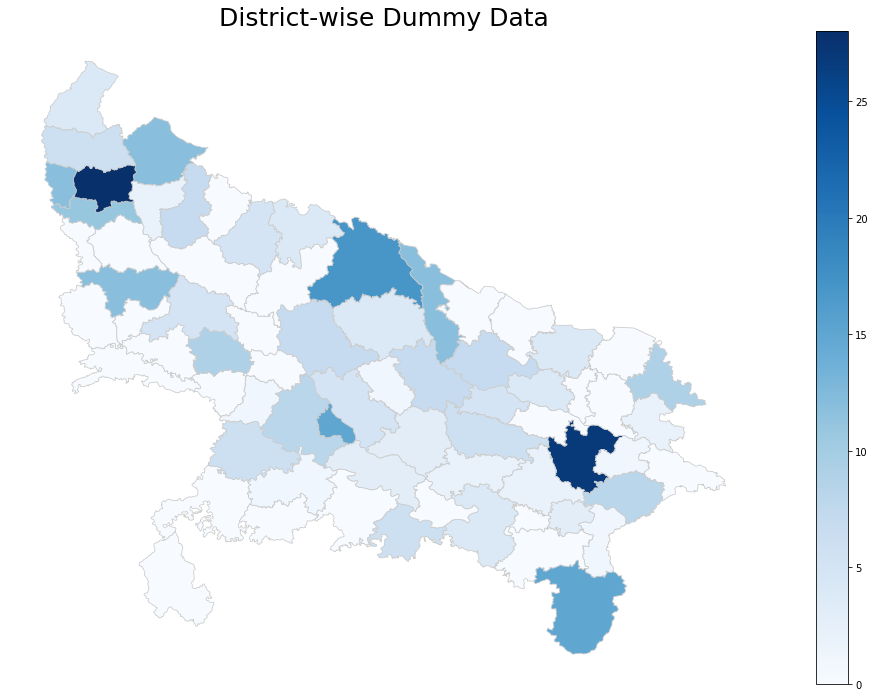

In [8]:
#Generate the choropleth map
fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column='count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
# remove the axis
ax.axis('off')
# add a title
ax.set_title('District-wise Dummy Data', fontdict={'fontsize': '25', 'fontweight' : '3'})
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=max_installs))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

# Generating a number of choropleth maps to stitch to form a video

In [9]:
#We've seen how to generate a standalone choropleth map using geopandas
#Now we'll attempt to generate a number of such maps and stitch them together
#to form an animated video
df['Installed On'] = df['Installed On'].apply(lambda x: x.split('T')[0])
df['Installed On'] = pd.to_datetime(df['Installed On'],format="%Y-%m-%d")
df.head()

,Tractor Model,Installed On,installation_state,installation_district
0,MAHINDRA ARJUN Ultra 605 DI-57HP,2019-10-12,Uttar Pradesh,Aligarh
1,MAHINDRA BHOOMIPUTRA 265 DI-35 HP,2019-10-14,Uttar Pradesh,Aligarh
2,MAHINDRA BHOOMIPUTRA 265 DI-35 HP,2019-10-14,Uttar Pradesh,Aligarh
3,MAHINDRA BHOOMIPUTRA 265 DI-35 HP,2019-11-26,Uttar Pradesh,Aligarh
4,MAHINDRA ARJUN Ultra 1 555 DI-50 HP,2020-01-09,Uttar Pradesh,Aligarh


findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.


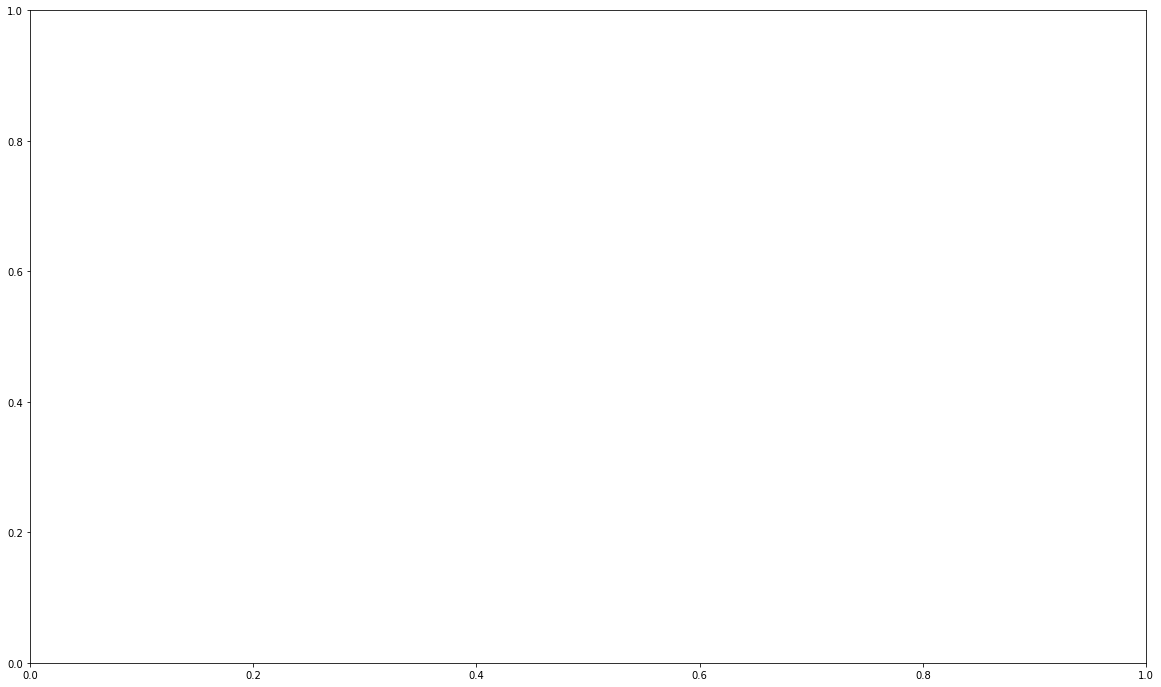

In [10]:
date_min = df['Installed On'].min()
n_days = df['Installed On'].nunique()

fig, ax = plt.subplots(1, figsize=(20, 12))

for i in range(0,n_days):
    date = date_min+timedelta(days=i)
    df_cumulative = df[df['Installed On'] <= date]
    df_temp = df_cumulative['installation_district'].value_counts().to_frame()
    df_temp.reset_index(inplace=True)
    df_temp.columns = ['district','count']
    merged = map_df_up.set_index('NAME_2').join(df_temp.set_index('district'))
    merged['count'].fillna(0,inplace=True)
    fig, ax = plt.subplots(1, figsize=(20, 12))
    merged.plot(column='count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
    # remove the axis
    ax.axis('off')
    # add a title
    ax.set_title('District-wise Dummy Data', fontdict={'fontsize': '25', 'fontweight' : '3'})
    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=df_temp['count'].iloc[0]))
    # empty array for the data range
    sm._A = []
    # add the colorbar to the figure
    cbar = fig.colorbar(sm)
    fontname = 'Open Sans'
    fontsize = 28
    # Positions for the date and grad counter
    date_x = 82
    date_y = 29
    date_spacing = 65

    ax.text(date_x, date_y, 
            f"{date.strftime('%b %d, %Y')}", 
            color='black',
            fontname=fontname, fontsize=fontsize*1.3)
    fig.savefig(f"frames_gpd/frame_{i:03d}.png", dpi=100, bbox_inches='tight')
    plt.close()

In [11]:
#Now that the frames have been created, they can be stitched together to form a video using the command prompt
#Open command promp and navigate to the frames_gpd folder
#The run the following command:
# >ffmpeg -framerate 5 -i frame_%3d.png -c:v h264 -r 30 -s 1920x1080 ./district_video.mp4

#To learn more about the different attributes of ffmpeg, see https://trac.ffmpeg.org/wiki/Slideshow